Import the tidyverse.

In [2]:
library('tidyverse')
 options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Bars

Let's use the "diamonds" data set. Preview the first five rows of the diamonds dataset using the `head` function.  
(*Hint: try* `?head` *to get the help page for the* `head` *function*)

In [6]:
diamonds%>%head()
diamonds |> dim()

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


[1] 53940    10

Make a bar chart of the "cut" column. About how many rows are there for the cut category "Ideal"?

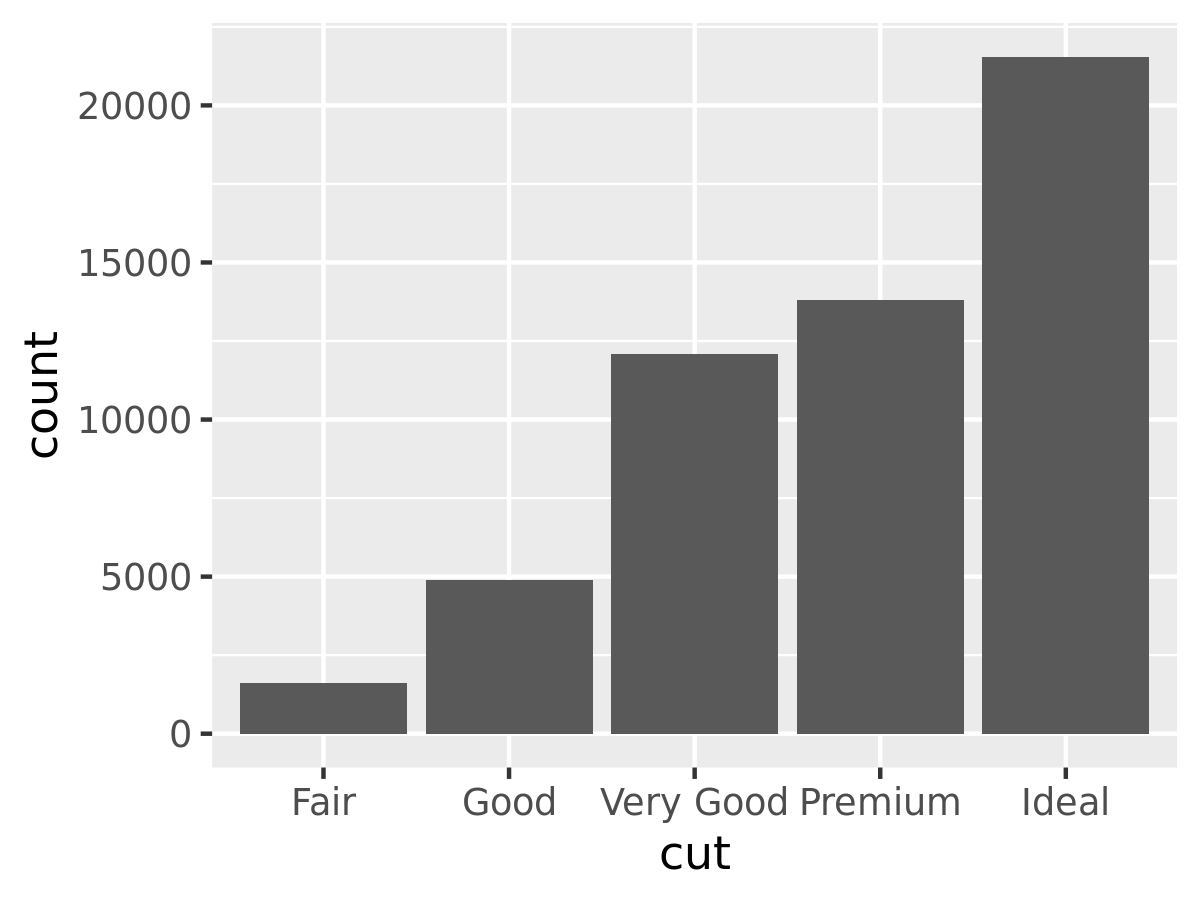

In [7]:
p = ggplot(diamonds, aes(x=cut)) + geom_bar()
p

Use `coord_flip` to rotate the chart by 90 degrees. 

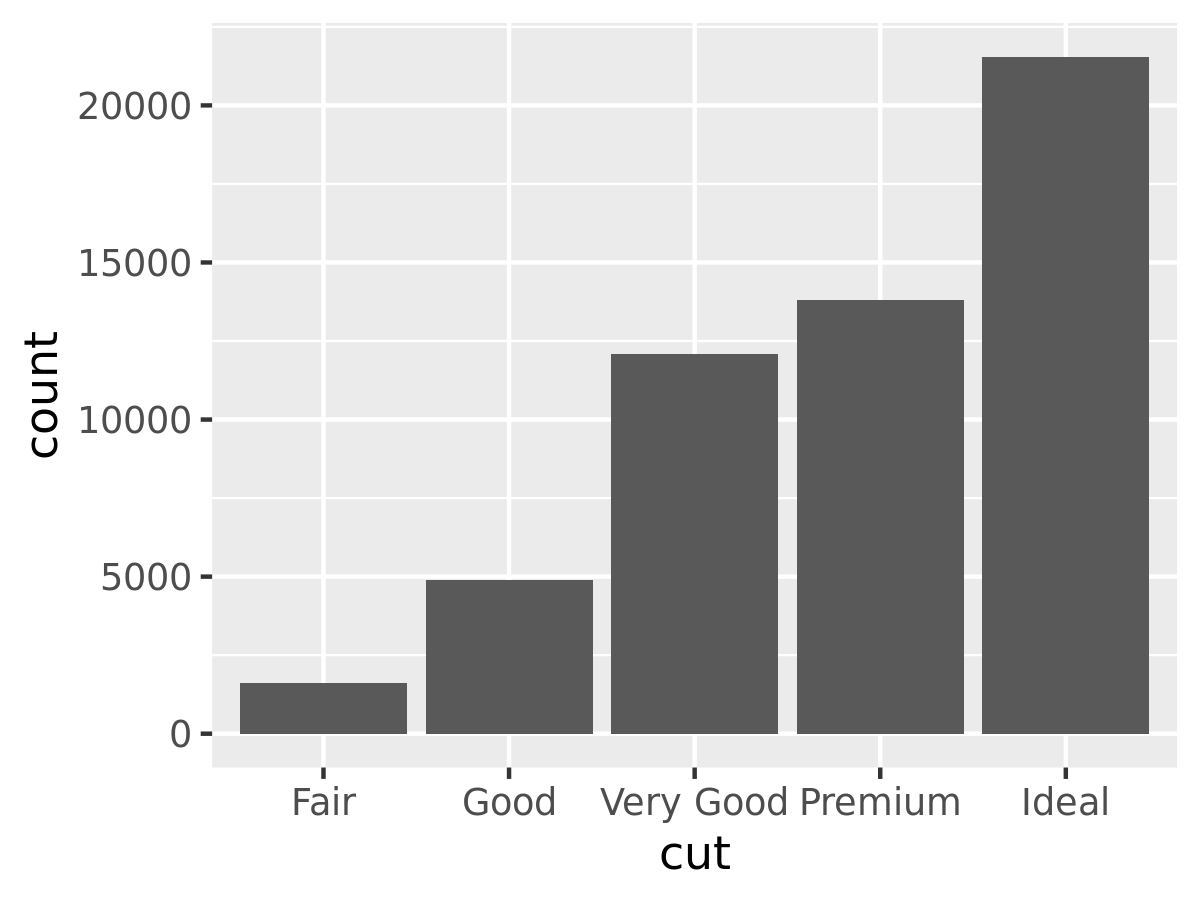

In [10]:
p = ggplot(diamonds, aes(x=cut), coord_flip) + geom_bar()
p

# Lines

We'll use flight data from the Bureau of Transportation Statistics
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

In [15]:
# uncomment the following:

library(nycflights13)
flight.data = flights %>%
   group_by(month, carrier, year) %>%
    summarize(N_flights = n()) %>%
    filter(carrier %in% c('UA', 'AA', 'US'))

`summarise()` has grouped output by 'month', 'carrier'. You can override using
the `.groups` argument.


Keep an eye out for red text in quotations, that indicates that jupyter understands the syntax as a word which can help diagnose errors

What are the columns in `flight.data`? (*Hint: preview the table*)

In [16]:
flights%>%head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 10:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 10:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 10:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 10:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 11:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 10:00:00


First, make a bar chart of the `carrier` column? Does this make sense?

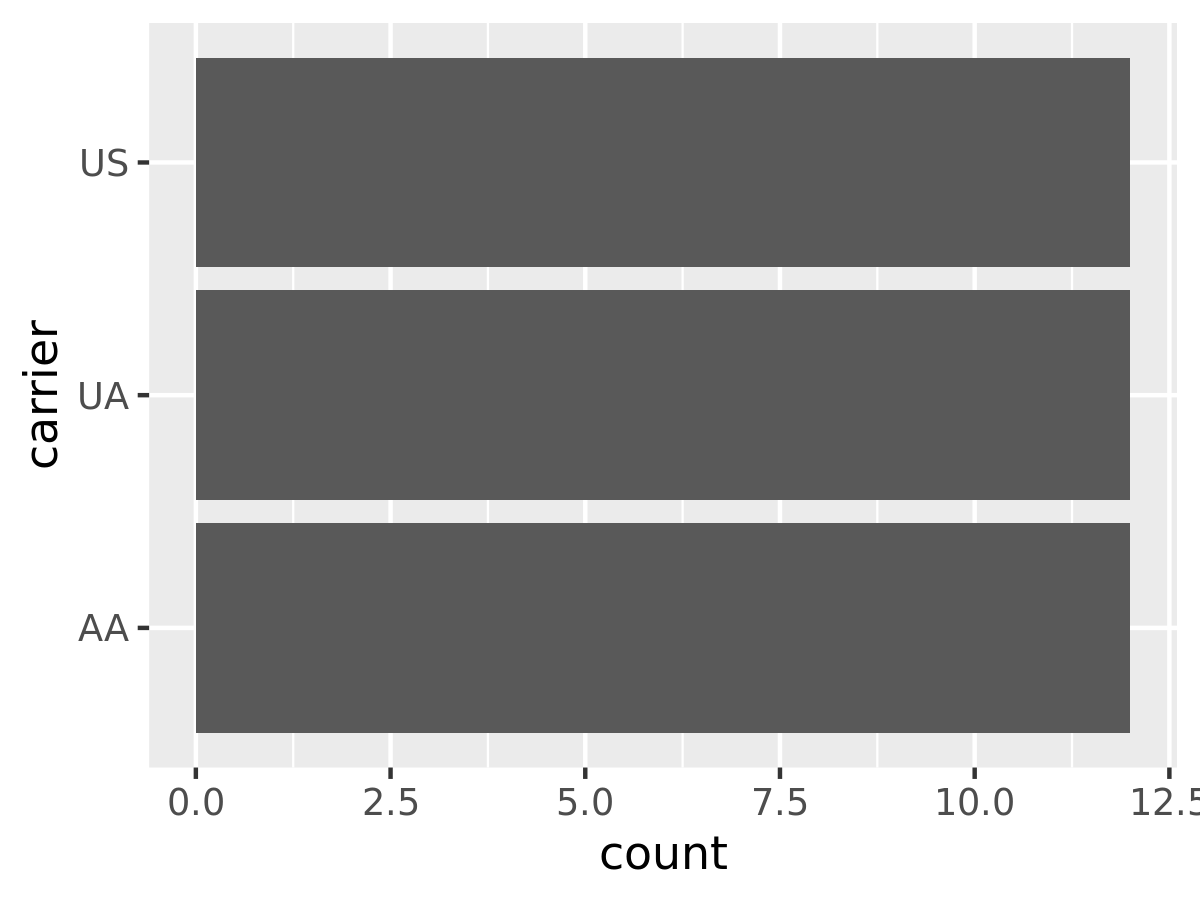

In [17]:
p = ggplot(flight.data, aes(y=carrier)) + geom_bar()
p

Plot month versus number of flights grouped according to carrier.

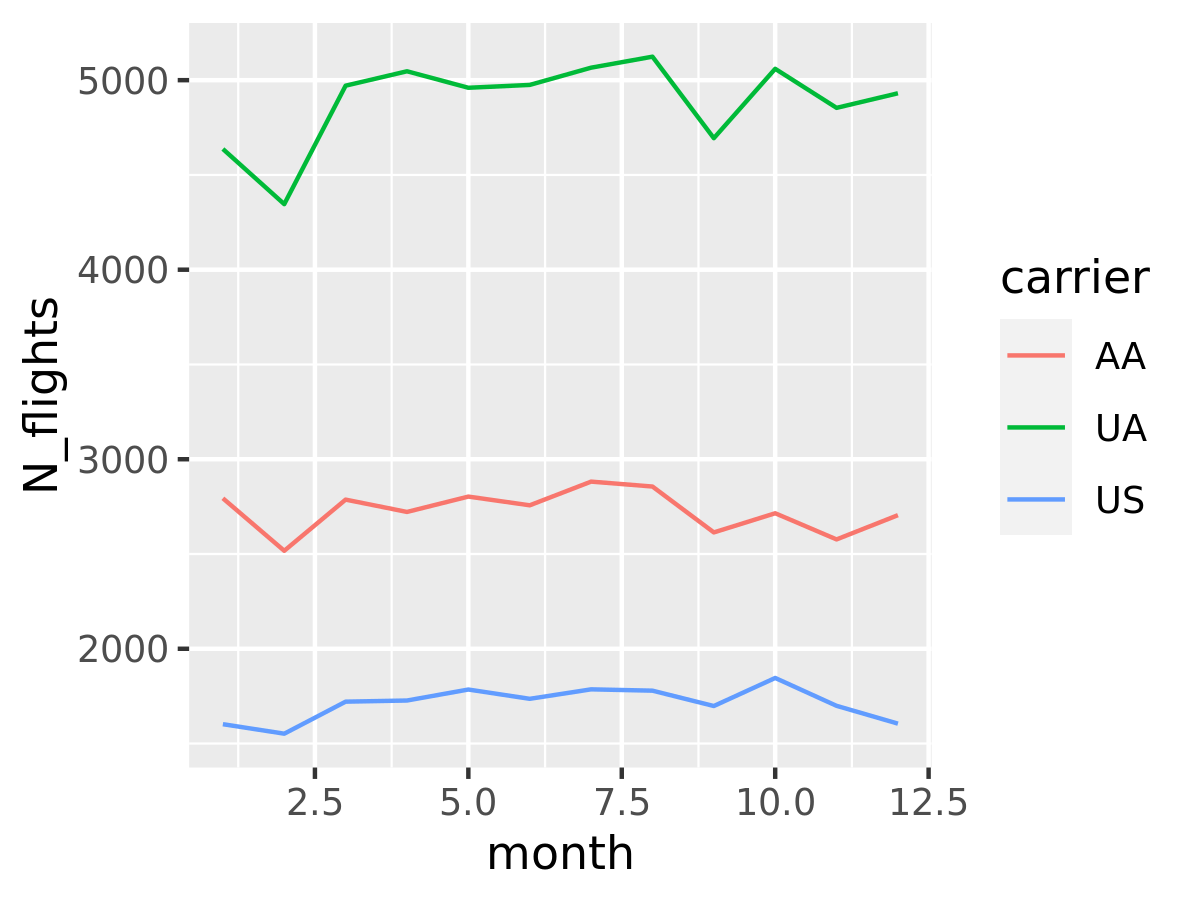

In [21]:
p = ggplot(flight.data, aes(x=month, y=N_flights, color=carrier)) + geom_line()
p

# Smooth

Plot a scatter plot (`geom_point`) of carat versus price with the diamonds dataset.

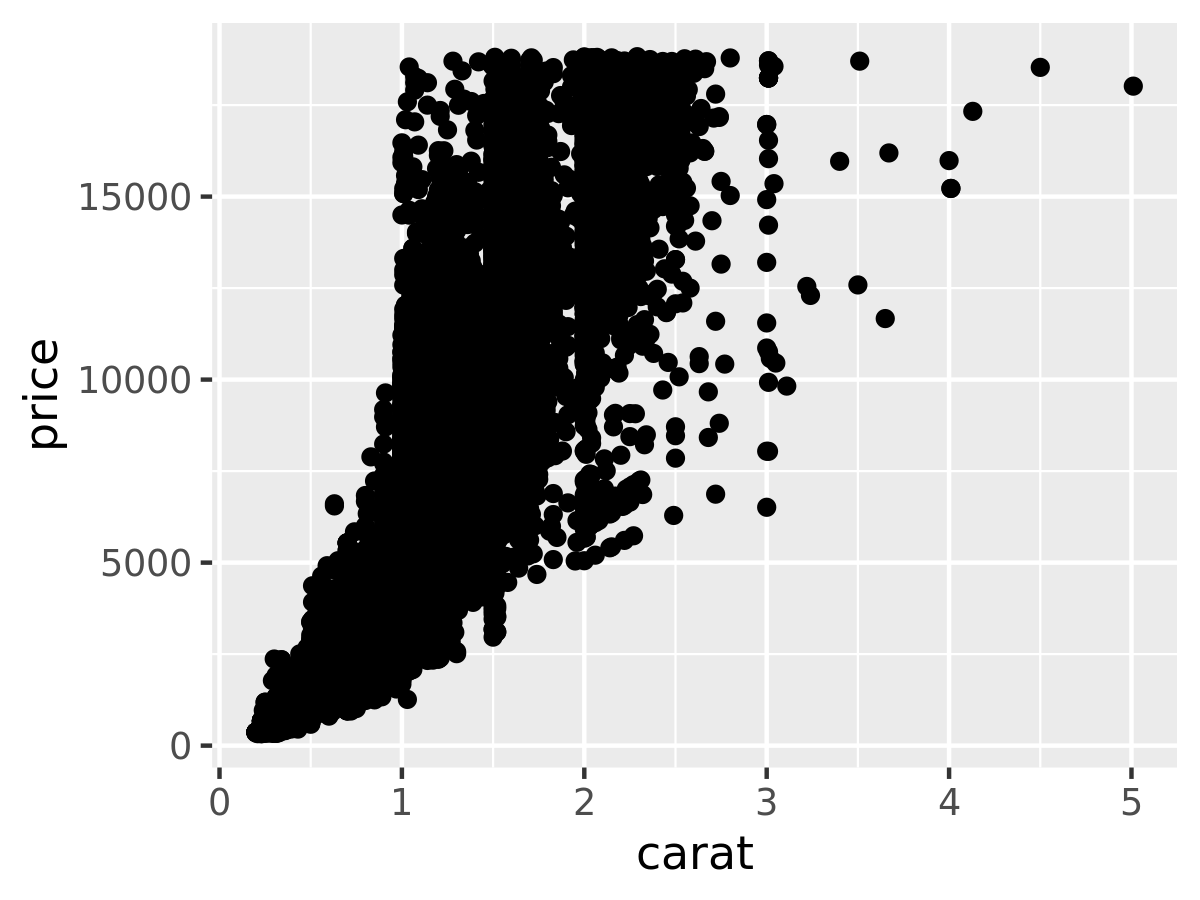

In [22]:
p = ggplot(diamonds, aes(x=carat, y=price)) + geom_point() 
p

There is a lot of overplotting in this figure. Make the same plot but use the `alpha` value to reduce
the opacity of the points.  
(*Hint: alpha values can be set from 0 (transparent) to 1 (opaque)*)

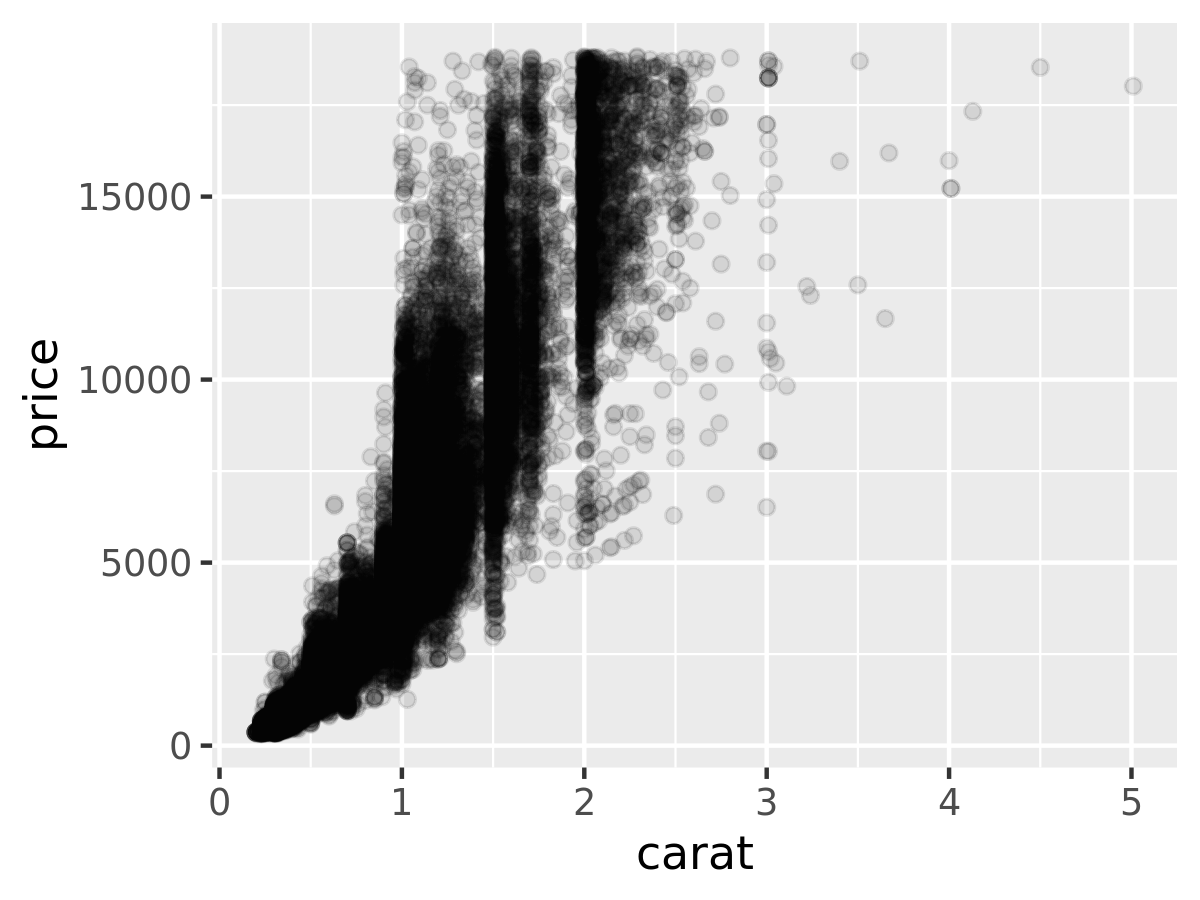

In [29]:
p = ggplot(diamonds, aes(x=carat, y=price)) + geom_point(alpha=0.10) 
p

Facetting can also help with overplotting. Facet the chart by `cut`.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


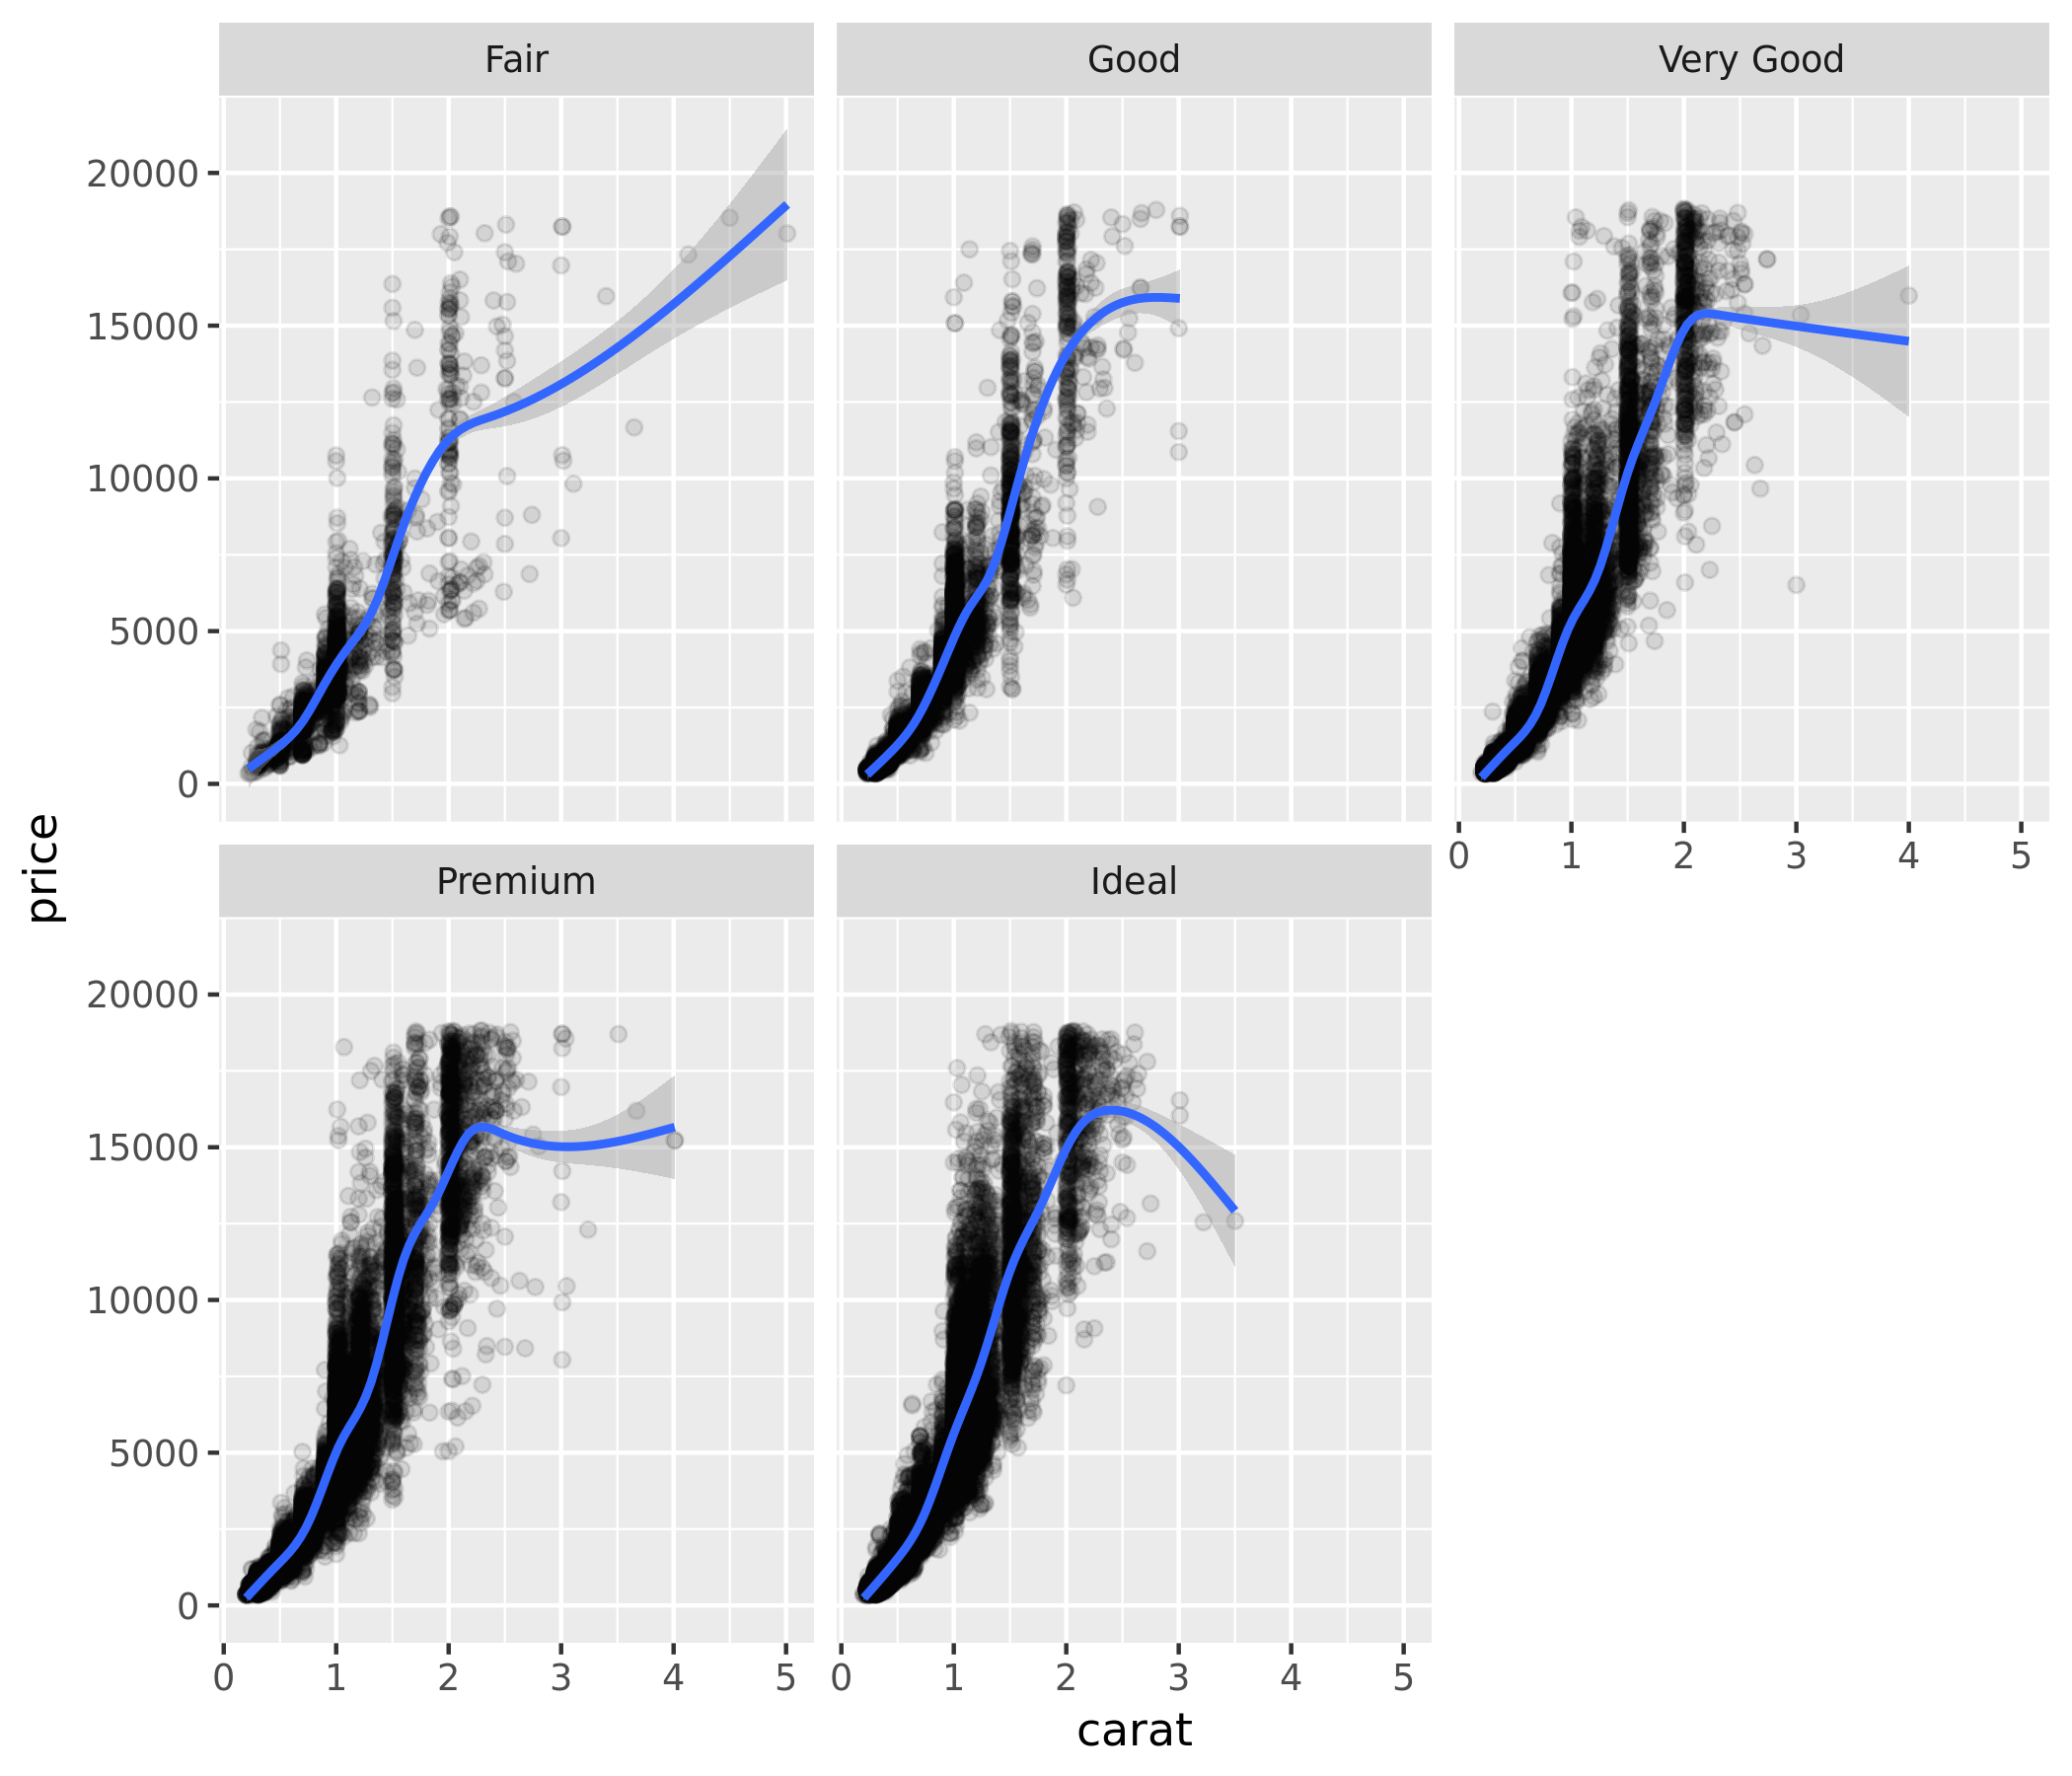

In [33]:
p = ggplot(diamonds, aes(x=carat, y=price)) + geom_point(alpha=0.10) + facet_wrap(~cut) + 
geom_smooth()
p

In [30]:
options(repr.plot.width=7, repr.plot.height=6)

Add a `geom_smooth` to your facetted plot to emphasize the trend in the data.